# Data about NBA players

## ABSTRACT

#### We are working on a NBA players dataset. We are going to extract data from 3 different sources .After a series of data processing, we merge them together into a dataset which includes their height, team, position and behavior. And then, we make an Entity-Relationship Diagram.

## Data 

### Data description:
    id 
    first_name
    last_name
    height_inches
    position
    team
    min:Average Min Played
    fgm:Field Goal Made
    fga:Field Goal Attempted
    pts:Average Points

## Data Source 1 - API

In [1]:
###### import libraries

In [83]:
import requests
import pandas as pd
import json
import urllib

In [84]:
rawNbaplayersData = []
Players = []

In [85]:
getNbaPlayerRequest = 'https://www.balldontlie.io/api/v1/players?per_page=100' + '&page='

In [86]:
print(getNbaPlayerRequest)

https://www.balldontlie.io/api/v1/players?per_page=100&page=


In [87]:
for page in range(25, 34):
    playerData = requests.get(getNbaPlayerRequest + str(page))
    rawNbaplayersData.append(playerData.json())
    Players += playerData.json()["data"]

In [88]:
print(playerData.json())

{'data': [{'id': 420, 'first_name': 'Marcus', 'height_feet': 6, 'height_inches': 4, 'last_name': 'Smart', 'position': 'G', 'team': {'id': 2, 'abbreviation': 'BOS', 'city': 'Boston', 'conference': 'East', 'division': 'Atlantic', 'full_name': 'Boston Celtics', 'name': 'Celtics'}, 'weight_pounds': 220}, {'id': 421, 'first_name': 'Dennis', 'height_feet': 6, 'height_inches': 3, 'last_name': 'Smith Jr.', 'position': 'G', 'team': {'id': 20, 'abbreviation': 'NYK', 'city': 'New York', 'conference': 'East', 'division': 'Atlantic', 'full_name': 'New York Knicks', 'name': 'Knicks'}, 'weight_pounds': 195}, {'id': 422, 'first_name': 'Ish', 'height_feet': 6, 'height_inches': 0, 'last_name': 'Smith', 'position': 'G', 'team': {'id': 30, 'abbreviation': 'WAS', 'city': 'Washington', 'conference': 'East', 'division': 'Southeast', 'full_name': 'Washington Wizards', 'name': 'Wizards'}, 'weight_pounds': 175}, {'id': 425, 'first_name': 'Zhaire', 'height_feet': 6, 'height_inches': 4, 'last_name': 'Smith', 'pos

In [89]:
print(rawNbaplayersData[0])

{'data': [{'id': 2909, 'first_name': 'Ken', 'height_feet': None, 'height_inches': None, 'last_name': 'Bannister', 'position': '', 'team': {'id': 13, 'abbreviation': 'LAC', 'city': 'LA', 'conference': 'West', 'division': 'Pacific', 'full_name': 'LA Clippers', 'name': 'Clippers'}, 'weight_pounds': None}, {'id': 2910, 'first_name': 'Ken', 'height_feet': None, 'height_inches': None, 'last_name': 'Norman', 'position': '', 'team': {'id': 13, 'abbreviation': 'LAC', 'city': 'LA', 'conference': 'West', 'division': 'Pacific', 'full_name': 'LA Clippers', 'name': 'Clippers'}, 'weight_pounds': None}, {'id': 2911, 'first_name': 'Loy', 'height_feet': None, 'height_inches': None, 'last_name': 'Vaught', 'position': '', 'team': {'id': 13, 'abbreviation': 'LAC', 'city': 'LA', 'conference': 'West', 'division': 'Pacific', 'full_name': 'LA Clippers', 'name': 'Clippers'}, 'weight_pounds': None}, {'id': 2912, 'first_name': 'Tom', 'height_feet': None, 'height_inches': None, 'last_name': 'Garrick', 'position': 

In [90]:
print(Players[1])

{'id': 2910, 'first_name': 'Ken', 'height_feet': None, 'height_inches': None, 'last_name': 'Norman', 'position': '', 'team': {'id': 13, 'abbreviation': 'LAC', 'city': 'LA', 'conference': 'West', 'division': 'Pacific', 'full_name': 'LA Clippers', 'name': 'Clippers'}, 'weight_pounds': None}


In [91]:
selectedColumns = ['id', 'first_name', 'last_name', 'position']
DataFrame = pd.DataFrame(Players, columns=selectedColumns)
print(DataFrame)

         id first_name         last_name position
0      2909        Ken         Bannister         
1      2910        Ken            Norman         
2      2911        Loy            Vaught         
3      2912        Tom           Garrick         
4      2913    Winston           Garland         
..      ...        ...               ...      ...
858  666641     Jaylen             Hoard        F
859     213      Aaron           Holiday        G
860     214       Jrue           Holiday        G
861     215     Justin           Holiday      F-G
862     216     Rondae  Hollis-Jefferson        F

[863 rows x 4 columns]


In [92]:
#Checking the NaN Data

In [93]:
DataFrame.isnull().any()

id            False
first_name    False
last_name     False
position      False
dtype: bool

In [94]:
#Get the shape of data

In [95]:
DataFrame.shape

(863, 4)

In [96]:
#Get the columns

In [97]:
DataFrame.columns

Index(['id', 'first_name', 'last_name', 'position'], dtype='object')

In [98]:
#Checkn the primary key

In [99]:
DataFrame['id'].is_unique

True

In [100]:
#Sort the data by the id

In [104]:
df1 = DataFrame.sort_values(by='id')
df1

,id,first_name,last_name,position
261,2,Jaylen,Adams,G
530,3,Steven,Adams,C
531,4,Bam,Adebayo,C-F
263,5,DeVaughn,Akoon-Purcell,G-F
532,6,LaMarcus,Aldridge,F
...,...,...,...,...
347,1358055,Anzejs,Pasecniks,C
365,1567838,Paul,Watson,G
353,1573276,Levi,Randolph,G
364,1603383,Gabe,Vincent,G


In [105]:
selectedColumns2 = ['id', 'height_inches','team']
DataFrame2 = pd.DataFrame(Players, columns=selectedColumns2)
DataFrame2.to_csv("players2.csv",encoding="utf-8",index=False)

##  Data Source 2 -- Data Set 

In [106]:
import pandas as pd
df22 = pd.read_csv("players2.csv")

In [107]:
df22.head()

,id,height_inches,team
0,2909,NaN,"{'id': 13, 'abbreviation': 'LAC', 'city': 'LA'..."
1,2910,NaN,"{'id': 13, 'abbreviation': 'LAC', 'city': 'LA'..."
2,2911,NaN,"{'id': 13, 'abbreviation': 'LAC', 'city': 'LA'..."
3,2912,NaN,"{'id': 13, 'abbreviation': 'LAC', 'city': 'LA'..."
4,2913,NaN,"{'id': 13, 'abbreviation': 'LAC', 'city': 'LA'..."


In [108]:
df22.info

<bound method DataFrame.info of          id  height_inches                                               team
0      2909            NaN  {'id': 13, 'abbreviation': 'LAC', 'city': 'LA'...
1      2910            NaN  {'id': 13, 'abbreviation': 'LAC', 'city': 'LA'...
2      2911            NaN  {'id': 13, 'abbreviation': 'LAC', 'city': 'LA'...
3      2912            NaN  {'id': 13, 'abbreviation': 'LAC', 'city': 'LA'...
4      2913            NaN  {'id': 13, 'abbreviation': 'LAC', 'city': 'LA'...
..      ...            ...                                                ...
858  666641            NaN  {'id': 25, 'abbreviation': 'POR', 'city': 'Por...
859     213            1.0  {'id': 12, 'abbreviation': 'IND', 'city': 'Ind...
860     214            4.0  {'id': 19, 'abbreviation': 'NOP', 'city': 'New...
861     215            6.0  {'id': 12, 'abbreviation': 'IND', 'city': 'Ind...
862     216            7.0  {'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...

[863 rows x 3 columns]>

In [109]:
#checking the missing and NaN data

In [110]:
df22.isnull().any()

id               False
height_inches     True
team             False
dtype: bool

In [111]:
df22.isnull().sum()

id                 0
height_inches    388
team               0
dtype: int64

In [112]:
#Use the mean of height to fill the NaN data

In [113]:
df22.mean()

id               126439.519119
height_inches         6.008421
dtype: float64

In [114]:
df2plus = df22.fillna(df22.mean())

In [115]:
df2plus

,id,height_inches,team
0,2909,6.008421,"{'id': 13, 'abbreviation': 'LAC', 'city': 'LA'..."
1,2910,6.008421,"{'id': 13, 'abbreviation': 'LAC', 'city': 'LA'..."
2,2911,6.008421,"{'id': 13, 'abbreviation': 'LAC', 'city': 'LA'..."
3,2912,6.008421,"{'id': 13, 'abbreviation': 'LAC', 'city': 'LA'..."
4,2913,6.008421,"{'id': 13, 'abbreviation': 'LAC', 'city': 'LA'..."
...,...,...,...
858,666641,6.008421,"{'id': 25, 'abbreviation': 'POR', 'city': 'Por..."
859,213,1.000000,"{'id': 12, 'abbreviation': 'IND', 'city': 'Ind..."
860,214,4.000000,"{'id': 19, 'abbreviation': 'NOP', 'city': 'New..."
861,215,6.000000,"{'id': 12, 'abbreviation': 'IND', 'city': 'Ind..."


In [116]:
#Recheck the null value

In [117]:
df2plus.isnull().any()

id               False
height_inches    False
team             False
dtype: bool

In [118]:
df2 = df2plus.sort_values(by='id')
df2

,id,height_inches,team
261,2,2.000000,"{'id': 17, 'abbreviation': 'MIL', 'city': 'Mil..."
530,3,0.000000,"{'id': 21, 'abbreviation': 'OKC', 'city': 'Okl..."
531,4,10.000000,"{'id': 16, 'abbreviation': 'MIA', 'city': 'Mia..."
263,5,6.008421,"{'id': 21, 'abbreviation': 'OKC', 'city': 'Okl..."
532,6,11.000000,"{'id': 27, 'abbreviation': 'SAS', 'city': 'San..."
...,...,...,...
347,1358055,6.008421,"{'id': 30, 'abbreviation': 'WAS', 'city': 'Was..."
365,1567838,6.008421,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor..."
353,1573276,6.008421,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev..."
364,1603383,6.008421,"{'id': 16, 'abbreviation': 'MIA', 'city': 'Mia..."


## Data Source 3 - Scraping Data 

##  Using the basic requests web scrapy to get the data from the website

In [119]:
import requests
import json
resq = []
Plays = []
for i in range(1, 61):
    req = requests.get(f'https://www.balldontlie.io/api/v1/season_averages?season=2018&player_ids[]={i}')
    req_dic = json.loads(req.text)
    Plays += req.json()["data"]
    resq.append(req_dic)
resq






[{'data': [{'games_played': 31,
    'player_id': 1,
    'season': 2018,
    'min': '18:50',
    'fgm': 1.74,
    'fga': 5.0,
    'fg3m': 1.26,
    'fg3a': 4.03,
    'ftm': 0.39,
    'fta': 0.42,
    'oreb': 0.16,
    'dreb': 1.39,
    'reb': 1.55,
    'ast': 0.65,
    'stl': 0.55,
    'blk': 0.19,
    'turnover': 0.45,
    'pf': 1.68,
    'pts': 5.13,
    'fg_pct': 0.348,
    'fg3_pct': 0.312,
    'ft_pct': 0.923}]},
 {'data': [{'games_played': 34,
    'player_id': 2,
    'season': 2018,
    'min': '12:34',
    'fgm': 1.12,
    'fga': 3.24,
    'fg3m': 0.74,
    'fg3a': 2.18,
    'ftm': 0.21,
    'fta': 0.26,
    'oreb': 0.32,
    'dreb': 1.47,
    'reb': 1.79,
    'ast': 1.94,
    'stl': 0.38,
    'blk': 0.15,
    'turnover': 0.82,
    'pf': 1.32,
    'pts': 3.18,
    'fg_pct': 0.345,
    'fg3_pct': 0.338,
    'ft_pct': 0.778}]},
 {'data': [{'games_played': 80,
    'player_id': 3,
    'season': 2018,
    'min': '33:19',
    'fgm': 6.01,
    'fga': 10.09,
    'fg3m': 0.0,
    'fg3a': 0

In [120]:
import pandas as pd
selectedColumns3 = ['player_id', 'games_played', 'min', 'fgm', 'fga', 'pts']
resqFrame = pd.DataFrame(Plays, columns = selectedColumns3)
print(resqFrame)

    player_id  games_played    min   fgm    fga    pts
0           1            31  18:50  1.74   5.00   5.13
1           2            34  12:34  1.12   3.24   3.18
2           3            80  33:19  6.01  10.09  13.85
3           4            82  23:19  3.41   5.93   8.89
4           5             7   3:05  0.43   1.43   1.00
5           6            81  33:10  8.44  16.28  21.32
6           7            11  10:56  1.18   3.55   3.36
7           8            48   8:40  1.40   3.71   4.40
8           9            80  26:12  4.19   7.10  10.91
9          10            82  27:56  3.13   7.23   9.27
10         11            55   8:21  1.15   2.82   3.16
11         12            43  29:48  3.49   6.42   8.05
12         13            43   7:28  0.49   1.60   1.47
13         14             3   2:03  0.00   1.00   0.00
14         15            77  30:37  9.36  16.19  25.90
15         16            10   1:03  0.00   0.30   0.20
16         17            10  29:24  4.90  12.10  13.40
17        

In [121]:
#Rename the name of columns to normalize the primary key

In [122]:
df3 = resqFrame.rename(columns = {'player_id':'id'})

In [123]:
#Check the null value

In [124]:
df3.isnull().any()

id              False
games_played    False
min             False
fgm             False
fga             False
pts             False
dtype: bool

In [125]:
df3

,id,games_played,min,fgm,fga,pts
0,1,31,18:50,1.74,5.00,5.13
1,2,34,12:34,1.12,3.24,3.18
2,3,80,33:19,6.01,10.09,13.85
3,4,82,23:19,3.41,5.93,8.89
4,5,7,3:05,0.43,1.43,1.00
5,6,81,33:10,8.44,16.28,21.32
6,7,11,10:56,1.18,3.55,3.36
7,8,48,8:40,1.40,3.71,4.40
8,9,80,26:12,4.19,7.10,10.91
9,10,82,27:56,3.13,7.23,9.27


# Data Visualization

## Using visualization gives a better understanding of the data

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Box Plot - A Box-Plot is a visual representation of a five point summary, with some additional information about outliers (1.5 times the lower and upper quartiles) Minimum = 0, Median = 8 

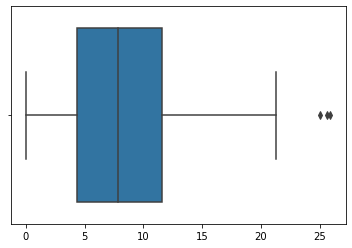

In [127]:
sns.boxplot(np.array(df3['pts']))

### Density Plot - We use probability densities instead of (or with) frequencies for density estimation. We use the fga(field goal made) data to see players' goal  distribution.

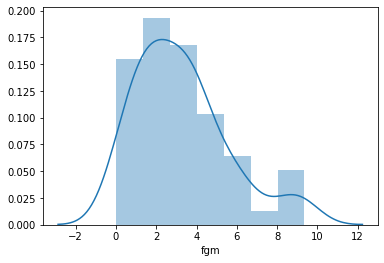

In [128]:
x = df3['fgm']
sns.distplot(x)

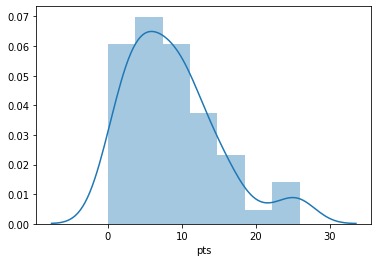

In [129]:
y = df3['pts']
sns.distplot(y)

### We can see a positive correlation between the pts and fga by using the joint plot.

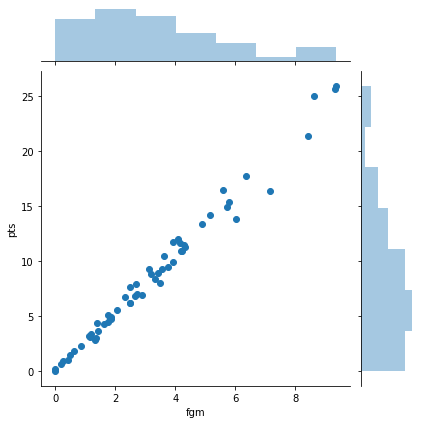

In [130]:
sns.jointplot(x=x, y=y, data=df3)

# CONCEPTUAL MODEL

## Generating Tables by Data

In [131]:
Players_Position = df1
Players_Position

,id,first_name,last_name,position
261,2,Jaylen,Adams,G
530,3,Steven,Adams,C
531,4,Bam,Adebayo,C-F
263,5,DeVaughn,Akoon-Purcell,G-F
532,6,LaMarcus,Aldridge,F
...,...,...,...,...
347,1358055,Anzejs,Pasecniks,C
365,1567838,Paul,Watson,G
353,1573276,Levi,Randolph,G
364,1603383,Gabe,Vincent,G


In [132]:
Players_Team = df2
Players_Team

,id,height_inches,team
261,2,2.000000,"{'id': 17, 'abbreviation': 'MIL', 'city': 'Mil..."
530,3,0.000000,"{'id': 21, 'abbreviation': 'OKC', 'city': 'Okl..."
531,4,10.000000,"{'id': 16, 'abbreviation': 'MIA', 'city': 'Mia..."
263,5,6.008421,"{'id': 21, 'abbreviation': 'OKC', 'city': 'Okl..."
532,6,11.000000,"{'id': 27, 'abbreviation': 'SAS', 'city': 'San..."
...,...,...,...
347,1358055,6.008421,"{'id': 30, 'abbreviation': 'WAS', 'city': 'Was..."
365,1567838,6.008421,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor..."
353,1573276,6.008421,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev..."
364,1603383,6.008421,"{'id': 16, 'abbreviation': 'MIA', 'city': 'Mia..."


In [133]:
Players_Stats = df3
Players_Stats

,id,games_played,min,fgm,fga,pts
0,1,31,18:50,1.74,5.00,5.13
1,2,34,12:34,1.12,3.24,3.18
2,3,80,33:19,6.01,10.09,13.85
3,4,82,23:19,3.41,5.93,8.89
4,5,7,3:05,0.43,1.43,1.00
5,6,81,33:10,8.44,16.28,21.32
6,7,11,10:56,1.18,3.55,3.36
7,8,48,8:40,1.40,3.71,4.40
8,9,80,26:12,4.19,7.10,10.91
9,10,82,27:56,3.13,7.23,9.27


## Generating CSV Files

In [134]:
Players_Position.to_csv("Players_Position.csv",encoding="utf-8",index=False)
Players_Team.to_csv("Players_Team.csv",encoding="utf-8",index=False)
Players_Stats.to_csv("Players_Stats.csv",encoding="utf-8",index=False)

In [135]:
Position = pd.read_csv("Players_Position.csv")
Position.head()

,id,first_name,last_name,position
0,2,Jaylen,Adams,G
1,3,Steven,Adams,C
2,4,Bam,Adebayo,C-F
3,5,DeVaughn,Akoon-Purcell,G-F
4,6,LaMarcus,Aldridge,F


In [136]:
Team = pd.read_csv("Players_Team.csv")
Team.head()

,id,height_inches,team
0,2,2.000000,"{'id': 17, 'abbreviation': 'MIL', 'city': 'Mil..."
1,3,0.000000,"{'id': 21, 'abbreviation': 'OKC', 'city': 'Okl..."
2,4,10.000000,"{'id': 16, 'abbreviation': 'MIA', 'city': 'Mia..."
3,5,6.008421,"{'id': 21, 'abbreviation': 'OKC', 'city': 'Okl..."
4,6,11.000000,"{'id': 27, 'abbreviation': 'SAS', 'city': 'San..."


In [137]:
Stats = pd.read_csv("Players_Stats.csv")
Stats.head()

,id,games_played,min,fgm,fga,pts
0,1,31,18:50,1.74,5.00,5.13
1,2,34,12:34,1.12,3.24,3.18
2,3,80,33:19,6.01,10.09,13.85
3,4,82,23:19,3.41,5.93,8.89
4,5,7,3:05,0.43,1.43,1.00


## Combining the three datasets over a common key(id) and the data remains consistent 

In [138]:
combined1 = pd.merge(Position, Team, left_on = 'id', right_on = 'id')
combined1

,id,first_name,last_name,position,height_inches,team
0,2,Jaylen,Adams,G,2.000000,"{'id': 17, 'abbreviation': 'MIL', 'city': 'Mil..."
1,3,Steven,Adams,C,0.000000,"{'id': 21, 'abbreviation': 'OKC', 'city': 'Okl..."
2,4,Bam,Adebayo,C-F,10.000000,"{'id': 16, 'abbreviation': 'MIA', 'city': 'Mia..."
3,5,DeVaughn,Akoon-Purcell,G-F,6.008421,"{'id': 21, 'abbreviation': 'OKC', 'city': 'Okl..."
4,6,LaMarcus,Aldridge,F,11.000000,"{'id': 27, 'abbreviation': 'SAS', 'city': 'San..."
...,...,...,...,...,...,...
858,1358055,Anzejs,Pasecniks,C,6.008421,"{'id': 30, 'abbreviation': 'WAS', 'city': 'Was..."
859,1567838,Paul,Watson,G,6.008421,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor..."
860,1573276,Levi,Randolph,G,6.008421,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev..."
861,1603383,Gabe,Vincent,G,6.008421,"{'id': 16, 'abbreviation': 'MIA', 'city': 'Mia..."


In [140]:
combined2 = pd.merge(combined1, Stats, left_on = 'id', right_on = 'id')
combined2

,id,first_name,last_name,position,height_inches,team,games_played,min,fgm,fga,pts
0,2,Jaylen,Adams,G,2.000000,"{'id': 17, 'abbreviation': 'MIL', 'city': 'Mil...",34,12:34,1.12,3.24,3.18
1,3,Steven,Adams,C,0.000000,"{'id': 21, 'abbreviation': 'OKC', 'city': 'Okl...",80,33:19,6.01,10.09,13.85
2,4,Bam,Adebayo,C-F,10.000000,"{'id': 16, 'abbreviation': 'MIA', 'city': 'Mia...",82,23:19,3.41,5.93,8.89
3,5,DeVaughn,Akoon-Purcell,G-F,6.008421,"{'id': 21, 'abbreviation': 'OKC', 'city': 'Okl...",7,3:05,0.43,1.43,1.00
4,6,LaMarcus,Aldridge,F,11.000000,"{'id': 27, 'abbreviation': 'SAS', 'city': 'San...",81,33:10,8.44,16.28,21.32
5,7,Rawle,Alkins,G,5.000000,"{'id': 5, 'abbreviation': 'CHI', 'city': 'Chic...",11,10:56,1.18,3.55,3.36
6,8,Grayson,Allen,G,5.000000,"{'id': 15, 'abbreviation': 'MEM', 'city': 'Mem...",48,8:40,1.40,3.71,4.40
7,9,Jarrett,Allen,C,11.000000,"{'id': 3, 'abbreviation': 'BKN', 'city': 'Broo...",80,26:12,4.19,7.10,10.91
8,10,Al-Farouq,Aminu,F,9.000000,"{'id': 22, 'abbreviation': 'ORL', 'city': 'Orl...",82,27:56,3.13,7.23,9.27
9,11,Justin,Anderson,G-F,6.000000,"{'id': 3, 'abbreviation': 'BKN', 'city': 'Broo...",55,8:21,1.15,2.82,3.16


## ER MODEL 

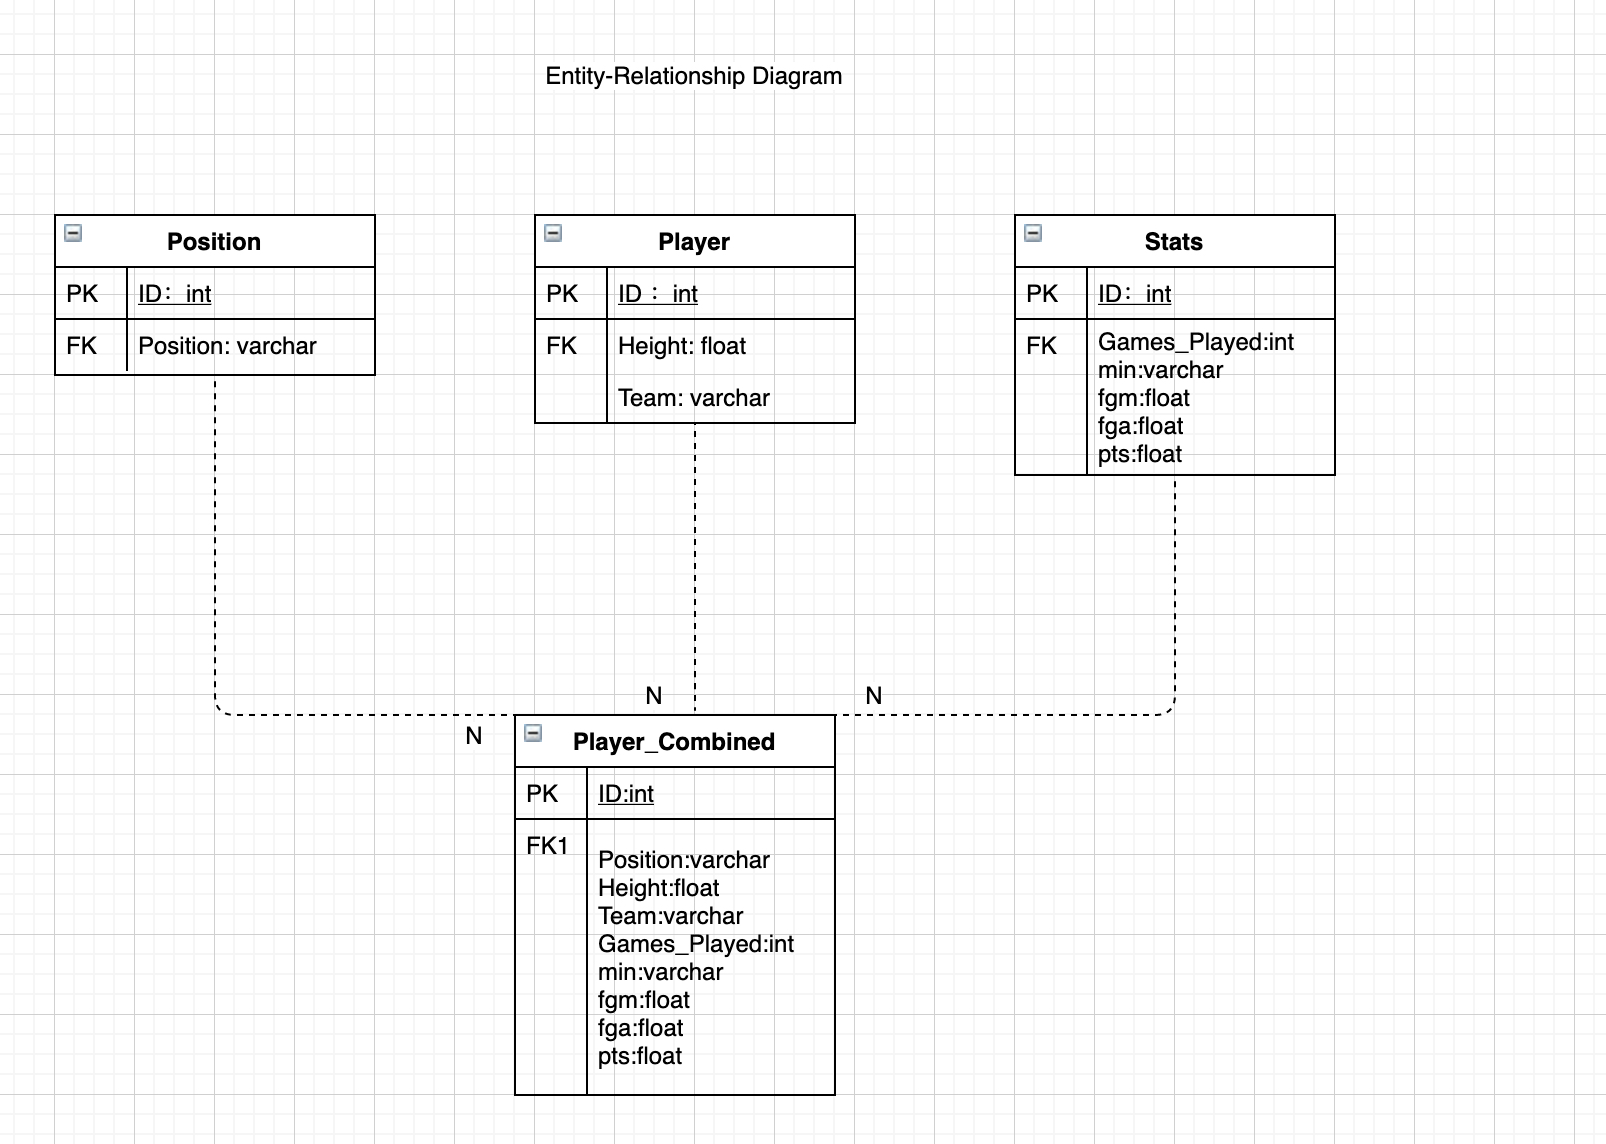

In [144]:
from IPython.display import Image
Image("ERD1.jpg")

### AUDIT VALIDITY/ACCURACY

We use the isnull().any() method to check the validity of the data and isnull().sum() to caculate the number of NaN data. And then, we use fillna() method to fill the NaN value.

### AUDIT COMPLETNESS

Always, the data of a player always include which team he is in, and which position he plays, and how many points he made in the field. We fetch these data from different sources and ensure our data completness

### AUDIT CONSISTENCY/UNIFORMITY 

The datasets which have been used in this assignment show a uniform relationship between each of the dataset since they are linked to each other by a primary key. 

### REPORT

file used: players2.csv

files generated: Players_Position.csv, Players_Team.csv, Players_Stats.csv 

Data gathered by API, raw data and web scraping to fit into a conceptual model.

We use some libraries to do this assignment incuding requests, json, url, pandas, numpy, seanborn, matplotlib and IPython. 

These libraries help us to extract data from three different places and audit the data.

And we also do the data visualization to gain some knowledge from the data.

### CONCLUSION
We have learned how to get the data from different places. And a rough understanding of how to process the data like data cleaning, data munging and the normalization of data. And how to merge the data into a conceptual database model and draw a Entity-Relationship Diagram. 

### CONTRIBUTION
I contributed By Own: 25%
By External Source: 75%

###  REFERENCES
Where we gained knowledge or codes.

https://www.balldontlie.io/#introduction

https://github.com/nikbearbrown/INFO_6210/blob/master/Week_2/NBB_Exploratory_Data%20Analysis.ipynb

https://github.com/nikbearbrown/INFO_6210/blob/master/Week_2/NBB_Data_cleaning_IMDB.ipynb

https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html

https://realpython.com/python-requests/

https://www.dataquest.io/blog/jupyter-notebook-tutorial/

### LICENSE
Copyright 2020 Tianqi Hu&Qiuting Zhang

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the "Software"), to deal in the Software without restriction, including without limitation the 
rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the 
Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE 
WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR 
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR 
OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.